In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
def load_de_signal(filepath):
    mat = sio.loadmat(filepath)
    key = [k for k in mat.keys() if 'DE_time' in k][0]
    signal = mat[key].flatten()
    return signal


In [3]:
normal_signal = load_de_signal("../data/raw/normal_0.mat")
fault_signal = load_de_signal("../data/raw/faulty_0.mat")

print(len(normal_signal), len(fault_signal))


243938 121265


In [4]:
def compute_fft(signal, fs=12000):
    N = len(signal)
    fft_vals = np.fft.fft(signal)
    fft_vals = np.abs(fft_vals)[:N//2]
    freqs = np.fft.fftfreq(N, 1/fs)[:N//2]
    return freqs, fft_vals


In [5]:
freq_n, fft_n = compute_fft(normal_signal)
freq_f, fft_f = compute_fft(fault_signal)


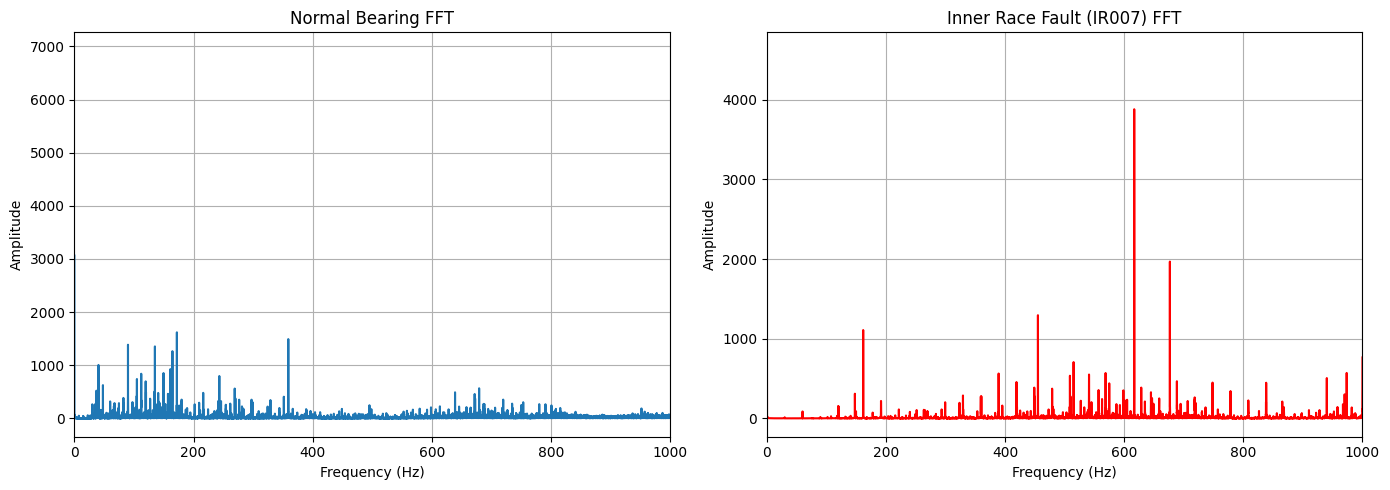

In [6]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(freq_n, fft_n)
plt.title("Normal Bearing FFT")
plt.xlim(0, 1000)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(freq_f, fft_f, color='red')
plt.title("Inner Race Fault (IR007) FFT")
plt.xlim(0, 1000)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()
